In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [5]:
train=pd.read_csv('../input/digit-recognizer/train.csv')

In [6]:
test=pd.read_csv('../input/digit-recognizer/test.csv')

In [7]:
train.shape

(42000, 785)

In [8]:
test.shape

(28000, 784)

In [9]:
#normilize the image data sets
train=train/255.0
test=test/255.0

In [10]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 


In [11]:
X_train= train.drop(labels=['label'],axis=1)

In [12]:
Y_train=train['label']

In [13]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [14]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [15]:
test.shape

(28000, 784)

In [16]:
test.shape

(28000, 784)

In [17]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [18]:
#label encoding
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [19]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=0)

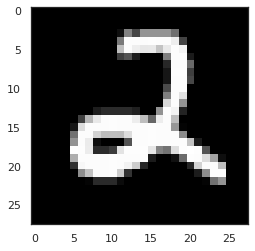

In [20]:
# Some examples
g = plt.imshow(X_train[0][:,:,0],cmap=plt.get_cmap('gray'))

In [21]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(2,2),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(2,2),padding='Same',activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [22]:
optimizer=RMSprop(lr=0.01,rho=0.9,epsilon=1e-08,decay=0.0)


In [23]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [24]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [25]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [26]:
datagen=ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images,
        vertical_flip=False)
datagen.fit(X_train)

In [29]:
batch_size=32

In [31]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = 2, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/2
1181/1181 - 17s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
1181/1181 - 15s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


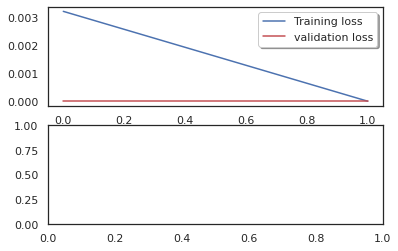

In [39]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

In [41]:
predictions = model.predict_classes(X_val, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)

NameError: name 'x_test' is not defined